In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sheaf_diffusion import SheafDiffusion, SheafDiffusionVisualizer

## Example of how to initialize your sheaf.

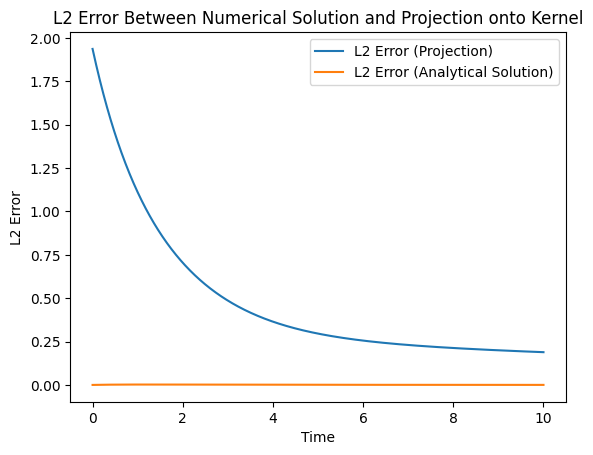

In [2]:
"""Example Usage:
The following example comes from Figure 2 of Ghrist and Hansen's "Opinion Dynamics on Discourse Sheaves"
"""
graph_structure = {'e1': ('v1', 'v2'), 'e2': ('v2', 'v3'), 'e3': ('v3', 'v4'), 'e4': ('v4', 'v1')}
node_spaces = {'v1': 1, 'v2': 2, 'v3': 1, 'v4': 2}
edge_spaces = {'e1': 1, 'e2': 1, 'e3': 1, 'e4': 2}
connecting_maps = {
    'e1': (np.array([[-2]]), np.array([[-1, 2]])),
    'e2': (np.array([[1, 1]]), np.array([[1]])),
    'e3': (np.array([[-1]]), np.array([[1, -1]])),
    'e4': (np.array([[1, -1], [1, 0]]), np.array([[1], [0]]))
}

# Create the sheaf diffusion instance
sheaf_diffusion = SheafDiffusion(graph_structure, node_spaces, edge_spaces, connecting_maps)

# Initial condition and parameters
initial_condition = [np.array([1]), np.array([0, 1]), np.array([0]), np.array([1, -1])]
alpha = 0.1
dt = 0.01
num_timesteps = 1000

# Run diffusion and compute analytical solution and projection
numerical_solution, all_states = sheaf_diffusion.run_diffusion(initial_condition, alpha, dt, num_timesteps)
projection = sheaf_diffusion.compute_projection(initial_condition)


# Compute and plot the L2 error over time
l2_errors = []

# Compute L2 error with the projection
projection_errors = []
times = np.arange(0, (num_timesteps + 1) * dt, dt)

for i, t in enumerate(times):
    l2_projection_error = np.linalg.norm(all_states[i] - projection)
    projection_errors.append(l2_projection_error)
    
    analytical = sheaf_diffusion.analytical_solution(initial_condition, alpha, t)
    l2_error = np.linalg.norm(all_states[i] - analytical)
    l2_errors.append(l2_error)

# Plot the L2 errors
plt.plot(times, projection_errors, label='L2 Error (Projection)')
plt.plot(times, l2_errors, label='L2 Error (Analytical Solution)')

plt.xlabel('Time')
plt.ylabel('L2 Error')
plt.title('L2 Error Between Numerical Solution and Projection onto Kernel as well as the analytical solution.')
plt.legend()
plt.show()


## Generating a video visualization of the diffusion process

In [ ]:
_, all_states = sheaf_diffusion.run_diffusion(initial_condition, alpha=0.1, dt=0.01, num_timesteps=1000)

# Create a visualizer and animate the diffusion process
visualizer = SheafDiffusionVisualizer(sheaf_diffusion, graph_structure)
visualizer.animate_diffusion(all_states, filename="sheaf_diffusion.mp4", interval=50)